## LTFS Data Science FinHack
### Vehicle Loan Default Prediction: To estimate the determinants of vehicle loan default

In [1]:
# imports pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# import
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset
df = pd.read_csv('./train.csv')

In [3]:
# display first 5 rows
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
# columns
print(df.columns)

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


In [5]:
# info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
#returns dimension
df.shape

(233154, 41)

In [7]:
# check nulls
print('Columns With Nulls')
df.isnull().sum() 

Columns With Nulls


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [8]:
# get unique Species names
EmpType = (df['Employment.Type'].unique())
print(EmpType)

# convert string / categoric to numeric
df['Employment.Type'] = pd.Categorical(df['Employment.Type'])
df['Employment.Type'] = df['Employment.Type'].cat.codes

['Salaried' 'Self employed' nan]


In [9]:
# import imputer
from sklearn.preprocessing import Imputer

# 7661 records out of 233154 records are found to be null so replacing it with mean values as its 3.2% of the whole records

imp=Imputer(missing_values='NaN', strategy='mean')
df['Employment.Type']=imp.fit_transform(df[['Employment.Type']]).ravel()
df['Employment.Type']=df['Employment.Type'].astype(int)

In [10]:
# After replacing check again for null
print('Columns With Nulls')
df.isnull().sum() 

Columns With Nulls


UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

loan_default
0    182543
1     50611
dtype: int64


Text(0.5, 1.0, 'loan_default')

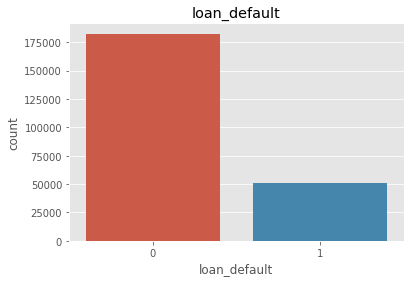

In [11]:
# loan_default groupby count    
print(df.groupby('loan_default').size())

# loan_default plot
plt.figure();
sns.countplot(df['loan_default'],label="Count")
plt.title('loan_default')

In [12]:
# extracting year from the DOB
df['Date.of.Birth']=df['Date.of.Birth'].apply(lambda x: datetime.strptime(x,'%d-%m-%y').year)

In [13]:
df['Date.of.Birth'].head()

0    1984
1    1985
2    1985
3    1993
4    1977
Name: Date.of.Birth, dtype: int64

In [14]:
# Calculating Age till 2018
#df = df.assign(Age="") 
df['Date.of.Birth'] = 2018-df["Date.of.Birth"]
# Renaming column DOB as Age
df=df.rename(columns={'Date.of.Birth':'Age'})

In [15]:
df['ltv'] = df['ltv'].astype(int)

In [16]:
df.drop(['DisbursalDate'],axis=1,inplace=True)

In [17]:
# Converting string values into numeric (no. of months)

df[['yrs','mnths']] = df['AVERAGE.ACCT.AGE'].str.split(' ', 2, expand=True)
df['yrs'] = df['yrs'].str.strip('yrs')
df['mnths'] = df['mnths'].str.strip('mon')
df['yrs'] = (df['yrs'].astype(float))
df['mnths'] = (df['mnths'].astype(float))
df['AVERAGE.ACCT.AGE']= df['yrs']*12 + df['mnths']

df.drop(['yrs'],axis=1,inplace=True)
df.drop(['mnths'],axis=1,inplace=True)

In [18]:
# Converting string values into numeric (no. of months)

df[['yrs1','mnths1']] = df['CREDIT.HISTORY.LENGTH'].str.split(' ', 2, expand=True)
df['yrs1'] = df['yrs1'].str.strip('yrs')
df['mnths1'] = df['mnths1'].str.strip('mon')
df['yrs1'] = df['yrs1'].astype(float)
df['mnths1'] = df['mnths1'].astype(float)
df['CREDIT.HISTORY.LENGTH']= df['yrs1']*12 + df['mnths1']    

df.drop(['yrs1'],axis=1,inplace=True)
df.drop(['mnths1'],axis=1,inplace=True)

In [19]:
dummies = pd.get_dummies(df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [20]:
dummies.head()

,A-Very Low Risk,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
df = pd.concat([df, dummies], axis=1)      
df.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1,inplace=True)

In [22]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,Employment.Type,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,420825,50578,58400,89,67,22807,45,1441,34,0,...,0,0,0,1,0,0,0,0,0,0
1,537409,47145,65550,73,67,22807,45,1502,33,1,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89,67,22807,45,1497,33,1,...,0,0,0,1,0,0,0,0,0,0
3,624493,57513,66113,88,67,22807,45,1501,25,1,...,0,1,0,0,0,0,0,0,0,0
4,539055,52378,60300,88,67,22807,45,1495,41,1,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# check relation with corelation - table
pd.options.display.float_format = '{:,.2f}'.format
print(df.corr())

                                                    UniqueID  \
UniqueID                                                1.00   
disbursed_amount                                        0.15   
asset_cost                                              0.14   
ltv                                                    -0.03   
branch_id                                              -0.00   
supplier_id                                             0.03   
manufacturer_id                                        -0.02   
Current_pincode_ID                                      0.03   
Age                                                    -0.00   
Employment.Type                                         0.01   
State_ID                                               -0.06   
Employee_code_ID                                        0.08   
MobileNo_Avl_Flag                                        nan   
Aadhar_flag                                            -0.00   
PAN_flag                                

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 59 columns):
UniqueID                                                   233154 non-null int64
disbursed_amount                                           233154 non-null int64
asset_cost                                                 233154 non-null int64
ltv                                                        233154 non-null int32
branch_id                                                  233154 non-null int64
supplier_id                                                233154 non-null int64
manufacturer_id                                            233154 non-null int64
Current_pincode_ID                                         233154 non-null int64
Age                                                        233154 non-null int64
Employment.Type                                            233154 non-null int32
State_ID                                                   233154 non-null int6

In [25]:
##############################################################
# Features Selection
##############################################################

# imports
from sklearn.model_selection import train_test_split

# split into data & target
colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)

# logistic regression summary- Model1

import statsmodels.formula.api as sm
df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model1 = sm.Logit(df_y_train, df_X_train)
result = model1.fit()
result.summary2()

         Current function value: 0.503585
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                Results: Logit
==============================================================================================================
Model:                              Logit                          Pseudo R-squared:               0.037      
Dependent Variable:                 0.0000                         AIC:                            157443.1069
Date:                               2019-04-20 11:33               BIC:                            157990.8506
No. Observations:                   156213                         Log-Likelihood:                 -78667.    
Df Model:                           54                             LL-Null:                        -81667.    
Df Residuals:                       156158                         LLR p-value:                    0.0000     
Converged:                          0.0000                         Scale:                          1.0000     
No. Iterations:                     35.0000                                                                   
--------------------------------------------------------------------------------------------------------------
                                                         Coef.   Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000    0.0000  -1.1504 0.2500    -0.0000    0.0000
asset_cost                                               0.0000    0.0000   4.3866 0.0000     0.0000    0.0000
ltv                                                      0.0344    0.0022  15.4499 0.0000     0.0300    0.0387
branch_id                                                0.0004    0.0001   4.8069 0.0000     0.0003    0.0006
supplier_id                                              0.0000    0.0000   4.2773 0.0000     0.0000    0.0000
manufacturer_id                                         -0.0031    0.0003 -10.5589 0.0000    -0.0037   -0.0025
Current_pincode_ID                                       0.0000    0.0000   9.9802 0.0000     0.0000    0.0000
Age                                                      0.0007    0.0003   2.6781 0.0074     0.0002    0.0013
Employment.Type                                          0.1252    0.0115  10.8474 0.0000     0.1026    0.1478
State_ID                                                 0.0211    0.0015  14.5456 0.0000     0.0183    0.0240
Employee_code_ID                                         0.0000    0.0000   5.2651 0.0000     0.0000    0.0000
MobileNo_Avl_Flag                                       -2.0080    0.5252  -3.8235 0.0001    -3.0374   -0.9787
Aadhar_flag                                             -0.2240    0.0188 -11.9179 0.0000    -0.2608   -0.1872
PAN_flag                                                -0.0725    0.0245  -2.9563 0.0031    -0.1206   -0.0244
Driving_flag                                            -0.2380    0.0444  -5.3561 0.0000    -0.3251   -0.1509
Passport_flag                                           -0.3403    0.1501  -2.2671 0.0234    -0.6345   -0.0461
PERFORM_CNS.SCORE                                       -0.0033    0.0006  -5.4566 0.0000    -0.0045   -0.0021
PRI.NO.OF.ACCTS                                         -0.0060    0.0023  -2.5877 0.0097    -0.0105   -0.0014
PRI.ACTIVE.ACCTS                                        -0.0690    0.0084  -8.1729 0.0000    -0.0856   -0.0525
PRI.OVERDUE.ACCTS                                        0.1266    0.0169   7.4684 0.0000     0.0933    0.1598
PRI.CURRENT.BALANCE                                     -0.0000    0.0000  -6.1097 0.0000    -0.0000   -0.0000
PRI.SANCTIONED.AMOUNT                                   -0.0000    0.0000  -0.4013 0.6882    -0.0000    0.0000
PRI.DISBURSED.AMOUNT                                     0.0000    0.0000   0.4550 0.6491    -0.0000    0.0000
SEC

In [26]:
# logistic regression summary- Model2
# Based on p- values remove the variable greater the 0.05

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model2 = sm.Logit(df_y_train, df_X_train)
result = model2.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503585
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157441.1071
Date:                             2019-04-20 11:35             BIC:                          157978.8918
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         53                           LL-Null:                      -81667.    
Df Residuals:                     156159                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1504 0.2500 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3866 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4499 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8069 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2773 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5589 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9802 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6781 0.0074  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8474 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5456 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2651 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0081   0.5252  -3.8236 0.0001 -3.0374 -0.9787
Aadhar_flag                                             -0.2240   0.0188 -11.9179 0.0000 -0.2608 -0.1872
PAN_flag                                                -0.0725   0.0245  -2.9563 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3561 0.0000 -0.3251 -0.1509
Passport_flag                                           -0.3403   0.1501  -2.2671 0.0234 -0.6345 -0.0461
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4566 0.0000 -0.0045 -0.0021
PRI.NO.OF.ACCTS                                         -0.0060   0.0023  -2.5877 0.0097 -0.0105 -0.0014
PRI.ACTIVE.ACCTS                                        -0.0690   0.0084  -8.1729 0.0000 -0.0856 -0.0525
PRI.OVERDUE.ACCTS                                        0.1266   0.0169   7.4684 0.0000  0.0933  0.1598
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1100 0.0000 -0.0000 -0.0000
PRI.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -0.4014 0.6882 -0.0000  0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   0.4550 0.6491 -0.0000  0.0000
SEC.NO.OF.ACCTS                                         -0.0153   0.0213  -0.7205 0.4712 -0.0570  0.0264
SEC.ACTIVE.ACCTS                                         0.0304   0.0449   0.6771 0.4983 -0.0576  0.1184
SEC.OV

In [27]:
# logistic regression summary- Model3

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model3 = sm.Logit(df_y_train, df_X_train)
result = model3.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503585
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157439.1414
Date:                             2019-04-20 11:35             BIC:                          157966.9671
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         52                           LL-Null:                      -81667.    
Df Residuals:                     156160                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1506 0.2499 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3870 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4509 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8067 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2774 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5593 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9785 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6809 0.0073  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8473 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5444 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2635 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0099   0.5251  -3.8278 0.0001 -3.0390 -0.9808
Aadhar_flag                                             -0.2240   0.0188 -11.9212 0.0000 -0.2609 -0.1872
PAN_flag                                                -0.0725   0.0245  -2.9553 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3574 0.0000 -0.3251 -0.1510
Passport_flag                                           -0.3405   0.1501  -2.2684 0.0233 -0.6347 -0.0463
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4540 0.0000 -0.0045 -0.0021
PRI.NO.OF.ACCTS                                         -0.0060   0.0023  -2.6585 0.0078 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0690   0.0084  -8.1705 0.0000 -0.0856 -0.0524
PRI.OVERDUE.ACCTS                                        0.1266   0.0169   7.4693 0.0000  0.0934  0.1598
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1552 0.0000 -0.0000 -0.0000
PRI.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -0.3988 0.6900 -0.0000  0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   0.4523 0.6510 -0.0000  0.0000
SEC.NO.OF.ACCTS                                         -0.0153   0.0213  -0.7207 0.4711 -0.0570  0.0264
SEC.ACTIVE.ACCTS                                         0.0304   0.0449   0.6778 0.4979 -0.0576  0.1185
SEC.OV

In [28]:
# logistic regression summary- Model4

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model4 = sm.Logit(df_y_train, df_X_train)
result = model4.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503586
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157437.2655
Date:                             2019-04-20 11:35             BIC:                          157955.1323
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         51                           LL-Null:                      -81667.    
Df Residuals:                     156161                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1504 0.2500 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3868 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4514 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8062 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2774 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5608 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9799 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6799 0.0074  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8479 0.0000  0.1026  0.1479
State_ID                                                 0.0211   0.0015  14.5457 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2639 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0091   0.5251  -3.8264 0.0001 -3.0382 -0.9800
Aadhar_flag                                             -0.2240   0.0188 -11.9208 0.0000 -0.2609 -0.1872
PAN_flag                                                -0.0725   0.0245  -2.9550 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3570 0.0000 -0.3251 -0.1509
Passport_flag                                           -0.3406   0.1501  -2.2691 0.0233 -0.6348 -0.0464
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4559 0.0000 -0.0045 -0.0021
PRI.NO.OF.ACCTS                                         -0.0060   0.0023  -2.6582 0.0079 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0691   0.0084  -8.1905 0.0000 -0.0857 -0.0526
PRI.OVERDUE.ACCTS                                        0.1267   0.0169   7.4769 0.0000  0.0935  0.1599
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1550 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3812 0.1672 -0.0000  0.0000
SEC.NO.OF.ACCTS                                         -0.0153   0.0213  -0.7214 0.4707 -0.0571  0.0264
SEC.ACTIVE.ACCTS                                         0.0304   0.0449   0.6776 0.4980 -0.0576  0.1185
SEC.OVERDUE.ACCTS                                        0.0909   0.0705   1.2895 0.1972 -0.0473  0.2292
SEC.CU

In [29]:
# logistic regression summary- Model5

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model5 = sm.Logit(df_y_train, df_X_train)
result = model5.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503587
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157435.7253
Date:                             2019-04-20 11:35             BIC:                          157943.6331
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         50                           LL-Null:                      -81667.    
Df Residuals:                     156162                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1504 0.2500 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3869 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4506 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8050 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2802 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5629 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9728 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6816 0.0073  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8487 0.0000  0.1026  0.1479
State_ID                                                 0.0211   0.0015  14.5506 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2615 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0101   0.5251  -3.8284 0.0001 -3.0392 -0.9810
Aadhar_flag                                             -0.2241   0.0188 -11.9236 0.0000 -0.2609 -0.1872
PAN_flag                                                -0.0724   0.0245  -2.9524 0.0032 -0.1205 -0.0243
Driving_flag                                            -0.2379   0.0444  -5.3551 0.0000 -0.3250 -0.1509
Passport_flag                                           -0.3413   0.1501  -2.2742 0.0230 -0.6355 -0.0472
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4538 0.0000 -0.0045 -0.0021
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6679 0.0076 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0694   0.0084  -8.2285 0.0000 -0.0859 -0.0529
PRI.OVERDUE.ACCTS                                        0.1267   0.0169   7.4752 0.0000  0.0935  0.1599
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1591 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3807 0.1674 -0.0000  0.0000
SEC.NO.OF.ACCTS                                         -0.0055   0.0150  -0.3652 0.7150 -0.0349  0.0239
SEC.OVERDUE.ACCTS                                        0.1023   0.0685   1.4939 0.1352 -0.0319  0.2365
SEC.CURRENT.BALANCE                                     -0.0000   0.0000  -0.8382 0.4019 -0.0000  0.0000
SEC.SA

In [30]:
# logistic regression summary- Model6

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model6 = sm.Logit(df_y_train, df_X_train)
result = model6.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503588
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157433.8603
Date:                             2019-04-20 11:35             BIC:                          157931.8091
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         49                           LL-Null:                      -81667.    
Df Residuals:                     156163                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1481 0.2509 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3853 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4495 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8050 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2832 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5628 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9803 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6794 0.0074  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8471 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5460 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2612 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0111   0.5251  -3.8303 0.0001 -3.0402 -0.9820
Aadhar_flag                                             -0.2241   0.0188 -11.9278 0.0000 -0.2610 -0.1873
PAN_flag                                                -0.0725   0.0245  -2.9562 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3571 0.0000 -0.3251 -0.1509
Passport_flag                                           -0.3416   0.1501  -2.2760 0.0228 -0.6358 -0.0474
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4521 0.0000 -0.0045 -0.0021
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6628 0.0077 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0692   0.0084  -8.2234 0.0000 -0.0857 -0.0527
PRI.OVERDUE.ACCTS                                        0.1268   0.0169   7.4818 0.0000  0.0936  0.1600
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1602 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3808 0.1673 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0917   0.0620   1.4786 0.1393 -0.0298  0.2131
SEC.CURRENT.BALANCE                                     -0.0000   0.0000  -0.8339 0.4044 -0.0000  0.0000
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9624 0.0497 -0.0000 -0.0000
SEC.DI

In [31]:
# logistic regression summary- Model7

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model7 = sm.Logit(df_y_train, df_X_train)
result = model7.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503590
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157432.5107
Date:                             2019-04-20 11:35             BIC:                          157920.5005
No. Observations:                 156213                       Log-Likelihood:               -78667.    
Df Model:                         48                           LL-Null:                      -81667.    
Df Residuals:                     156164                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1478 0.2510 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3850 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4497 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8049 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2818 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5616 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9799 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6823 0.0073  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8471 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5493 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2623 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0121   0.5250  -3.8322 0.0001 -3.0412 -0.9830
Aadhar_flag                                             -0.2241   0.0188 -11.9270 0.0000 -0.2610 -0.1873
PAN_flag                                                -0.0724   0.0245  -2.9535 0.0031 -0.1205 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3563 0.0000 -0.3251 -0.1509
Passport_flag                                           -0.3418   0.1501  -2.2774 0.0228 -0.6360 -0.0476
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4504 0.0000 -0.0044 -0.0021
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6686 0.0076 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0691   0.0084  -8.2201 0.0000 -0.0856 -0.0527
PRI.OVERDUE.ACCTS                                        0.1268   0.0169   7.4809 0.0000  0.0936  0.1600
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1628 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3805 0.1674 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0929   0.0619   1.5019 0.1331 -0.0283  0.2142
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9459 0.0517 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.9005 0.0574 -0.0000  0.0000
SEC.IN

In [32]:
# logistic regression summary- Model8

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model8 = sm.Logit(df_y_train, df_X_train)
result = model8.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503592
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157431.1891
Date:                             2019-04-20 11:35             BIC:                          157909.2199
No. Observations:                 156213                       Log-Likelihood:               -78668.    
Df Model:                         47                           LL-Null:                      -81667.    
Df Residuals:                     156165                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1486 0.2507 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3855 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4499 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8083 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2790 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5608 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9823 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6835 0.0073  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8435 0.0000  0.1025  0.1478
State_ID                                                 0.0211   0.0015  14.5533 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2635 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0130   0.5250  -3.8339 0.0001 -3.0421 -0.9839
Aadhar_flag                                             -0.2241   0.0188 -11.9246 0.0000 -0.2609 -0.1873
PAN_flag                                                -0.0725   0.0245  -2.9550 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2380   0.0444  -5.3568 0.0000 -0.3251 -0.1509
Passport_flag                                           -0.3418   0.1501  -2.2773 0.0228 -0.6360 -0.0476
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4481 0.0000 -0.0044 -0.0021
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6701 0.0076 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0692   0.0084  -8.2267 0.0000 -0.0857 -0.0527
PRI.OVERDUE.ACCTS                                        0.1267   0.0169   7.4779 0.0000  0.0935  0.1599
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1618 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3804 0.1675 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0949   0.0618   1.5337 0.1251 -0.0264  0.2161
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9401 0.0524 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8963 0.0579 -0.0000  0.0000
NEW.AC

In [33]:
# logistic regression summary- Model9

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model9 = sm.Logit(df_y_train, df_X_train)
result = model9.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503595
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157430.0550
Date:                             2019-04-20 11:36             BIC:                          157898.1269
No. Observations:                 156213                       Log-Likelihood:               -78668.    
Df Model:                         46                           LL-Null:                      -81667.    
Df Residuals:                     156166                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1464 0.2516 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3832 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4499 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8063 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2774 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5585 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9772 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6919 0.0071  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8488 0.0000  0.1026  0.1479
State_ID                                                 0.0211   0.0015  14.5586 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2672 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.0219   0.5249  -3.8517 0.0001 -3.0508 -0.9931
Aadhar_flag                                             -0.2239   0.0188 -11.9152 0.0000 -0.2607 -0.1871
PAN_flag                                                -0.0724   0.0245  -2.9520 0.0032 -0.1205 -0.0243
Driving_flag                                            -0.2379   0.0444  -5.3556 0.0000 -0.3250 -0.1509
Passport_flag                                           -0.3415   0.1501  -2.2756 0.0229 -0.6356 -0.0474
PERFORM_CNS.SCORE                                       -0.0033   0.0006  -5.4289 0.0000 -0.0044 -0.0021
PRI.NO.OF.ACCTS                                         -0.0060   0.0023  -2.6515 0.0080 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0649   0.0070  -9.2602 0.0000 -0.0786 -0.0511
PRI.OVERDUE.ACCTS                                        0.1249   0.0168   7.4230 0.0000  0.0919  0.1579
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.2714 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3876 0.1652 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0982   0.0617   1.5917 0.1114 -0.0227  0.2192
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9129 0.0558 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8702 0.0615 -0.0000  0.0000
DELINQ

In [34]:
# logistic regression summary- Model10

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)

df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model10 = sm.Logit(df_y_train, df_X_train)
result = model10.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503597
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157428.9309
Date:                             2019-04-20 11:36             BIC:                          157887.0438
No. Observations:                 156213                       Log-Likelihood:               -78668.    
Df Model:                         45                           LL-Null:                      -81667.    
Df Residuals:                     156167                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1465 0.2516 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3815 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4499 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8084 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2751 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5613 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9837 0.0000  0.0000  0.0000
Age                                                      0.0008   0.0003   2.6955 0.0070  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8468 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5565 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2669 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.4660   0.2241 -11.0017 0.0000 -2.9053 -2.0266
Aadhar_flag                                             -0.2240   0.0188 -11.9209 0.0000 -0.2608 -0.1872
PAN_flag                                                -0.0725   0.0245  -2.9557 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2381   0.0444  -5.3591 0.0000 -0.3252 -0.1510
Passport_flag                                           -0.3420   0.1501  -2.2786 0.0227 -0.6361 -0.0478
PERFORM_CNS.SCORE                                       -0.0027   0.0002 -14.2646 0.0000 -0.0031 -0.0024
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6598 0.0078 -0.0105 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0653   0.0070  -9.3453 0.0000 -0.0790 -0.0516
PRI.OVERDUE.ACCTS                                        0.1254   0.0168   7.4600 0.0000  0.0925  0.1584
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.2643 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3864 0.1656 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0982   0.0617   1.5912 0.1116 -0.0228  0.2192
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9124 0.0558 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8697 0.0615 -0.0000  0.0000
DELINQ

In [35]:
# logistic regression summary- Model11

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model11 = sm.Logit(df_y_train, df_X_train)
result = model11.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503598
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157427.1675
Date:                             2019-04-20 11:36             BIC:                          157875.3214
No. Observations:                 156213                       Log-Likelihood:               -78669.    
Df Model:                         44                           LL-Null:                      -81667.    
Df Residuals:                     156168                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
disbursed_amount                                        -0.0000   0.0000  -1.1463 0.2517 -0.0000  0.0000
asset_cost                                               0.0000   0.0000   4.3814 0.0000  0.0000  0.0000
ltv                                                      0.0344   0.0022  15.4497 0.0000  0.0300  0.0387
branch_id                                                0.0004   0.0001   4.8073 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2734 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.5631 0.0000 -0.0037 -0.0025
Current_pincode_ID                                       0.0000   0.0000   9.9842 0.0000  0.0000  0.0000
Age                                                      0.0008   0.0003   2.6961 0.0070  0.0002  0.0013
Employment.Type                                          0.1252   0.0115  10.8482 0.0000  0.1026  0.1478
State_ID                                                 0.0211   0.0015  14.5564 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2671 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.5038   0.2103 -11.9050 0.0000 -2.9160 -2.0916
Aadhar_flag                                             -0.2240   0.0188 -11.9188 0.0000 -0.2608 -0.1871
PAN_flag                                                -0.0725   0.0245  -2.9560 0.0031 -0.1206 -0.0244
Driving_flag                                            -0.2381   0.0444  -5.3593 0.0000 -0.3252 -0.1510
Passport_flag                                           -0.3415   0.1501  -2.2757 0.0229 -0.6357 -0.0474
PERFORM_CNS.SCORE                                       -0.0027   0.0002 -15.9356 0.0000 -0.0030 -0.0024
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6714 0.0076 -0.0106 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0654   0.0070  -9.3533 0.0000 -0.0791 -0.0517
PRI.OVERDUE.ACCTS                                        0.1259   0.0168   7.4965 0.0000  0.0930  0.1588
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.2698 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3862 0.1657 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0982   0.0617   1.5914 0.1115 -0.0228  0.2192
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9121 0.0559 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8695 0.0616 -0.0000  0.0000
DELINQ

In [36]:
# logistic regression summary- Model12

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')
colNames.remove('disbursed_amount')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model12 = sm.Logit(df_y_train, df_X_train)
result = model12.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503602
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157426.4749
Date:                             2019-04-20 11:36             BIC:                          157864.6698
No. Observations:                 156213                       Log-Likelihood:               -78669.    
Df Model:                         43                           LL-Null:                      -81667.    
Df Residuals:                     156169                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
asset_cost                                               0.0000   0.0000  16.6683 0.0000  0.0000  0.0000
ltv                                                      0.0319   0.0007  46.4577 0.0000  0.0306  0.0333
branch_id                                                0.0004   0.0001   4.8309 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2370 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.7539 0.0000 -0.0037 -0.0026
Current_pincode_ID                                       0.0000   0.0000   9.9377 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6908 0.0071  0.0002  0.0013
Employment.Type                                          0.1257   0.0115  10.8988 0.0000  0.1031  0.1483
State_ID                                                 0.0212   0.0015  14.5838 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2688 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.3331   0.1485 -15.7138 0.0000 -2.6241 -2.0421
Aadhar_flag                                             -0.2242   0.0188 -11.9315 0.0000 -0.2610 -0.1874
PAN_flag                                                -0.0717   0.0245  -2.9257 0.0034 -0.1198 -0.0237
Driving_flag                                            -0.2376   0.0444  -5.3482 0.0000 -0.3247 -0.1505
Passport_flag                                           -0.3416   0.1501  -2.2760 0.0228 -0.6358 -0.0474
PERFORM_CNS.SCORE                                       -0.0027   0.0002 -15.9360 0.0000 -0.0030 -0.0024
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6809 0.0073 -0.0106 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0654   0.0070  -9.3547 0.0000 -0.0791 -0.0517
PRI.OVERDUE.ACCTS                                        0.1259   0.0168   7.4970 0.0000  0.0930  0.1588
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.2788 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3885 0.1650 -0.0000  0.0000
SEC.OVERDUE.ACCTS                                        0.0984   0.0617   1.5939 0.1110 -0.0226  0.2194
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9100 0.0561 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8674 0.0618 -0.0000  0.0000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                      0.1858   0.0193   9.6460 0.0000  0.1480  0.2235
AVERAG

In [37]:
# logistic regression summary- Model13

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')
colNames.remove('disbursed_amount')
colNames.remove('PRI.DISBURSED.AMOUNT')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
model13 = sm.Logit(df_y_train, df_X_train)
result = model13.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503614
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157427.9874
Date:                             2019-04-20 11:36             BIC:                          157856.2234
No. Observations:                 156213                       Log-Likelihood:               -78671.    
Df Model:                         42                           LL-Null:                      -81667.    
Df Residuals:                     156170                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
asset_cost                                               0.0000   0.0000  16.6685 0.0000  0.0000  0.0000
ltv                                                      0.0319   0.0007  46.4519 0.0000  0.0306  0.0333
branch_id                                                0.0004   0.0001   4.8288 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2322 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.7493 0.0000 -0.0037 -0.0026
Current_pincode_ID                                       0.0000   0.0000   9.9428 0.0000  0.0000  0.0000
Age                                                      0.0007   0.0003   2.6738 0.0075  0.0002  0.0013
Employment.Type                                          0.1258   0.0115  10.9046 0.0000  0.1032  0.1484
State_ID                                                 0.0212   0.0015  14.5835 0.0000  0.0183  0.0240
Employee_code_ID                                         0.0000   0.0000   5.2626 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.3333   0.1485 -15.7155 0.0000 -2.6243 -2.0423
Aadhar_flag                                             -0.2241   0.0188 -11.9263 0.0000 -0.2609 -0.1873
PAN_flag                                                -0.0718   0.0245  -2.9263 0.0034 -0.1198 -0.0237
Driving_flag                                            -0.2376   0.0444  -5.3479 0.0000 -0.3247 -0.1505
Passport_flag                                           -0.3416   0.1501  -2.2761 0.0228 -0.6358 -0.0475
PERFORM_CNS.SCORE                                       -0.0027   0.0002 -15.9314 0.0000 -0.0030 -0.0024
PRI.NO.OF.ACCTS                                         -0.0061   0.0023  -2.6817 0.0073 -0.0106 -0.0016
PRI.ACTIVE.ACCTS                                        -0.0653   0.0070  -9.3404 0.0000 -0.0790 -0.0516
PRI.OVERDUE.ACCTS                                        0.1260   0.0168   7.5033 0.0000  0.0931  0.1589
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.1297 0.0000 -0.0000 -0.0000
SEC.OVERDUE.ACCTS                                        0.0982   0.0617   1.5908 0.1117 -0.0228  0.2192
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.9105 0.0561 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.8679 0.0618 -0.0000  0.0000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                      0.1858   0.0193   9.6488 0.0000  0.1481  0.2236
AVERAGE.ACCT.AGE                                         0.0045   0.0010   4.7121 0.0000  0.0026  0.0064
CREDIT

In [38]:
# logistic regression summary- Model_final

colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')
colNames.remove('disbursed_amount')
colNames.remove('SEC.OVERDUE.ACCTS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)



df_y_train = pd.DataFrame(y_train)
df_X_train = pd.DataFrame(X_train)
df_X_train.columns = colNames
modelf = sm.Logit(df_y_train, df_X_train)
result = modelf.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.503610
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                        Pseudo R-squared:             0.037      
Dependent Variable:               0.0000                       AIC:                          157426.9399
Date:                             2019-04-20 11:36             BIC:                          157855.1759
No. Observations:                 156213                       Log-Likelihood:               -78670.    
Df Model:                         42                           LL-Null:                      -81667.    
Df Residuals:                     156170                       LLR p-value:                  0.0000     
Converged:                        1.0000                       Scale:                        1.0000     
No. Iterations:                   6.0000                                                                
--------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------------------------
asset_cost                                               0.0000   0.0000  16.6658 0.0000  0.0000  0.0000
ltv                                                      0.0319   0.0007  46.4587 0.0000  0.0306  0.0333
branch_id                                                0.0004   0.0001   4.8192 0.0000  0.0003  0.0006
supplier_id                                              0.0000   0.0000   4.2335 0.0000  0.0000  0.0000
manufacturer_id                                         -0.0031   0.0003 -10.7455 0.0000 -0.0037 -0.0026
Current_pincode_ID                                       0.0000   0.0000   9.9177 0.0000  0.0000  0.0000
Age                                                      0.0008   0.0003   2.6966 0.0070  0.0002  0.0013
Employment.Type                                          0.1258   0.0115  10.9074 0.0000  0.1032  0.1484
State_ID                                                 0.0212   0.0015  14.6056 0.0000  0.0184  0.0241
Employee_code_ID                                         0.0000   0.0000   5.2576 0.0000  0.0000  0.0000
MobileNo_Avl_Flag                                       -2.3356   0.1485 -15.7315 0.0000 -2.6266 -2.0446
Aadhar_flag                                             -0.2242   0.0188 -11.9316 0.0000 -0.2610 -0.1874
PAN_flag                                                -0.0715   0.0245  -2.9154 0.0036 -0.1195 -0.0234
Driving_flag                                            -0.2379   0.0444  -5.3544 0.0000 -0.3250 -0.1508
Passport_flag                                           -0.3430   0.1501  -2.2851 0.0223 -0.6371 -0.0488
PERFORM_CNS.SCORE                                       -0.0027   0.0002 -15.9186 0.0000 -0.0030 -0.0023
PRI.NO.OF.ACCTS                                         -0.0062   0.0023  -2.7185 0.0066 -0.0107 -0.0017
PRI.ACTIVE.ACCTS                                        -0.0656   0.0070  -9.3764 0.0000 -0.0793 -0.0519
PRI.OVERDUE.ACCTS                                        0.1252   0.0168   7.4574 0.0000  0.0923  0.1581
PRI.CURRENT.BALANCE                                     -0.0000   0.0000  -6.3169 0.0000 -0.0000 -0.0000
PRI.DISBURSED.AMOUNT                                     0.0000   0.0000   1.3893 0.1647 -0.0000  0.0000
SEC.SANCTIONED.AMOUNT                                   -0.0000   0.0000  -1.7265 0.0843 -0.0000  0.0000
SEC.DISBURSED.AMOUNT                                     0.0000   0.0000   1.6928 0.0905 -0.0000  0.0000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS                      0.1889   0.0192   9.8543 0.0000  0.1513  0.2264
AVERAGE.ACCT.AGE                                         0.0044   0.0010   4.6396 0.0000  0.0026  0.0063
CREDIT

In [39]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.783
Test set score: 0.782


In [40]:
# cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(logreg, X, y, cv=10)
print("Mean Cross Validation Accuracy: {:.3f}".format(metrics.accuracy_score(y, predicted)))

Mean Cross Validation Accuracy: 0.783


In [41]:
# Individual Cross Val Accuracy
from sklearn.model_selection import cross_val_score 

accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print ("Individual Cross Validation Accuracy")
print (accuracy)
print ("Mean Cross Validation Accuracy: {:.3f}".format(accuracy.mean()))

Individual Cross Validation Accuracy
[0.78290518 0.78293875 0.78293875 0.78292944 0.78292944 0.78292944
 0.78292944 0.78292944 0.78292944 0.78292944]
Mean Cross Validation Accuracy: 0.783


In [42]:
# check accuracy
print (metrics.accuracy_score(y, predicted)) 

0.7829288796246258


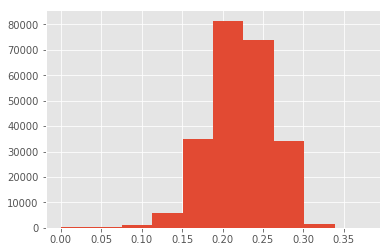

In [43]:
# probabality
probs = logreg.predict_proba(X)[:, 1] 
plt.hist(probs) 
plt.show()

In [44]:
# calculate AUC 
print (metrics.roc_auc_score(y, probs))

0.5157497802257551


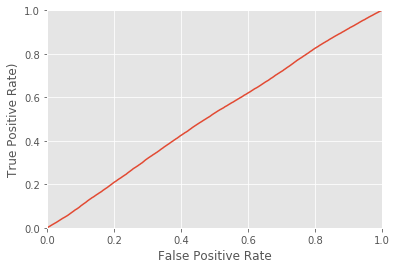

In [45]:
# ROC CURVES and AUC 
# plot ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

##### The accuracy of Logistic regression is 78.2 and ROC_AUC Score value is 51.5. Lets check the accuracy for other classifiers

In [46]:
# counts
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

# counts
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [122350  33863]]
Frequency of unique values of the said array:
[[    0     1]
 [60193 16748]]


In [47]:
# Load sklearn libraries
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# list of models
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [48]:
# blank list to store results
xvResults = []

# blank list to store model names
xvModels = []

# cross validation
msg = "%6s: %10s %8s" % ("Model", "XVResMean", "XVRes-SD")
print(msg)
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=707)
    xvAccuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    xvResults.append(xvAccuracy)
    xvModels.append(name)
    msg = "%7s: %5.7f %5.7f" % (name, xvAccuracy.mean(), xvAccuracy.std())
    print(msg)

 Model:  XVResMean XVRes-SD
   CART: 0.6689840 0.0054645
     NB: 0.7672607 0.0640506
     RF: 0.7688669 0.0048002


In [49]:
# original
cm = confusion_matrix(y_test, y_test)
print("Original")
print(cm)

# confusion matrix
for name, model in models:
    # fit the model
    model.fit(X_train, y_train)
    # predicting the Test set results
    y_pred = model.predict(X_test)
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # X-axis Predicted | Y-axis Actual
    print(name)
    print(cm)
    predicted = cross_val_predict(model, X, y, cv=10)
    cmAccuracy = accuracy_score(y, predicted)
    print(cmAccuracy)

Original
[[60193     0]
 [    0 16748]]
CART
[[46565 13628]
 [12058  4690]]
0.6293951637115383
NB
[[60075   118]
 [16734    14]]
0.7449454008938299
RF
[[57848  2345]
 [15513  1235]]
0.745460082177445


##### From above, the accuracy value for Random forest classifier is 76.8. So, lets build the model with Random Forest algorithm and check the accuracy and ROC_AUC score

In [50]:
# split into data & target
colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')
colNames.remove('disbursed_amount')
colNames.remove('SEC.OVERDUE.ACCTS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=707)

In [51]:
################################
# Classification Model
###############################

# imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
# create a random forest Classifier; 
# rfc means 'Random Forest Classifier'
rfc = RandomForestClassifier(random_state=707)

In [53]:
# train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=707, verbose=0, warm_start=False)

In [54]:
# predicting the Test set results
y_pred = rfc.predict(X_test)

In [55]:
# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
# X-axis Predicted | Y-axis Actual
print(cfm)

[[57782  2411]
 [15432  1316]]


In [56]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

76.80950338571112


In [57]:
# creating list of K for KNN
lstTrees = list(range(10,15))

# creating list of cv scores
cvScores = []

# perform 10-fold cross validation
for l in lstTrees:
    rfc = RandomForestClassifier(n_estimators=l, random_state=707)
    scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
    print(scores)
    cvScores.append(scores.mean())
print("Average CV Accuracy")    
print(cvScores)

[0.77437063 0.76595471 0.75634757 0.7526914  0.72678533 0.72905855
 0.73733648 0.7381514  0.7494317  0.73990993]
[0.76647939 0.75677646 0.74618288 0.74256916 0.71224534 0.71267424
 0.72464079 0.71155908 0.73506326 0.7217671 ]
[0.77492816 0.76651227 0.7570338  0.75620845 0.72481235 0.72764315
 0.73823719 0.73472014 0.74960326 0.7428694 ]
[0.77093966 0.75900669 0.75055756 0.74638645 0.71649153 0.71743513
 0.7264422  0.71936522 0.73870899 0.73034527]
[0.77591457 0.76784183 0.75926402 0.75676603 0.72704268 0.731632
 0.73785117 0.7367789  0.75024662 0.74638645]
Average CV Accuracy
[0.7470037699183212, 0.7329957713140611, 0.7472568157735758, 0.7375678685671745, 0.7489724257560042]


In [58]:
# changing to misclassification error
mcError = [1 - x for x in cvScores]
print(mcError)

[0.2529962300816788, 0.26700422868593887, 0.25274318422642417, 0.2624321314328255, 0.2510275742439958]


In [59]:
# finding best k
knBest = lstTrees[mcError.index(min(mcError))]
print(knBest)

14


In [60]:
# create Random Forest model
rfc1 = RandomForestClassifier(random_state=707).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rfc1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rfc1.score(X_test, y_test)))

Training set score: 0.975
Test set score: 0.768


In [61]:
predicted = cross_val_predict(rfc1, X, y, cv=10)
print("Mean Cross Validation Accuracy: {:.3f}".format(metrics.accuracy_score(y, predicted)))

Mean Cross Validation Accuracy: 0.747


In [62]:
# check accuracy 
print (metrics.accuracy_score(y, predicted))

0.7470041260282904


In [63]:
# check precision
print (metrics.precision_score(y, predicted) )

0.2149081007488087


In [64]:
# check recall
print (metrics.recall_score(y, predicted) )

0.06237774396870246


In [65]:
#calculate AUC
probs = rfc1.predict_proba(X)[:, 1]
print(metrics.roc_auc_score(y,probs))

0.9111626810521855


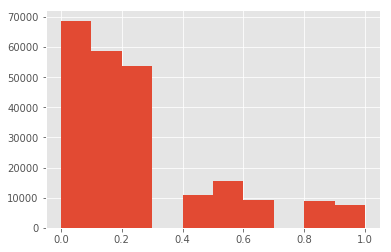

In [66]:
plt.hist(probs) 
plt.show()

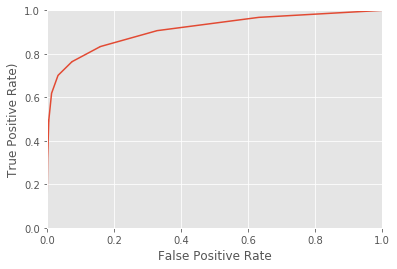

In [67]:
# ROC CURVES and AUC 
# plot ROC curve 
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

##### Accuracy for RF is 76.8 and ROC_AUC score is 91.1 as the score is much better than Logistic regression, lets consider RF model and build the prediction further. Also ROC curve is also better in-case of Random Forest

In [73]:
##############################################################
# Prediction
##############################################################

# read dataset
dfPrd = pd.read_csv('./test.csv')
print(dfPrd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [74]:
dfPrd['Date.of.Birth']=dfPrd['Date.of.Birth'].apply(lambda x: datetime.strptime(x,'%d-%m-%y').year)

In [75]:
dfPrd['Date.of.Birth'].head()

0    1974
1    1985
2    1995
3    1973
4    1972
Name: Date.of.Birth, dtype: int64

In [76]:
# Calculating Age till 2018
dfPrd['Date.of.Birth'] = 2018-dfPrd["Date.of.Birth"]
# Renaming column DOB as Age
dfPrd = dfPrd.rename(columns={'Date.of.Birth':'Age'})

In [77]:
# get unique Species names
EmpType = (dfPrd['Employment.Type'].unique())
print(EmpType)

# convert string / categoric to numeric
dfPrd['Employment.Type'] = pd.Categorical(dfPrd['Employment.Type'])
dfPrd['Employment.Type'] = dfPrd['Employment.Type'].cat.codes

# import imputer
#from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN', strategy='mean')
dfPrd['Employment.Type']=imp.fit_transform(dfPrd[['Employment.Type']]).ravel()
dfPrd['Employment.Type']=dfPrd['Employment.Type'].astype(int)

['Salaried' 'Self employed' nan]


In [78]:
dfPrd['ltv'] = dfPrd['ltv'].astype(int)

In [79]:
dfPrd.drop(['DisbursalDate'],axis=1,inplace=True)

In [80]:
dfPrd[['yrs','mnths']] = dfPrd['AVERAGE.ACCT.AGE'].str.split(' ', 2, expand=True)
dfPrd['yrs'] = dfPrd['yrs'].str.strip('yrs')
dfPrd['mnths'] = dfPrd['mnths'].str.strip('mon')
dfPrd['yrs'] = (dfPrd['yrs'].astype(float))
dfPrd['mnths'] = (dfPrd['mnths'].astype(float))
dfPrd['AVERAGE.ACCT.AGE']= dfPrd['yrs']*12 + dfPrd['mnths']
dfPrd.drop(['yrs'],axis=1,inplace=True)
dfPrd.drop(['mnths'],axis=1,inplace=True)

In [81]:
dfPrd[['yrs1','mnths1']] = dfPrd['CREDIT.HISTORY.LENGTH'].str.split(' ', 2, expand=True)
dfPrd['yrs1'] = dfPrd['yrs1'].str.strip('yrs')
dfPrd['mnths1'] = dfPrd['mnths1'].str.strip('mon')
dfPrd['yrs1'] = dfPrd['yrs1'].astype(float)
dfPrd['mnths1'] = dfPrd['mnths1'].astype(float)
dfPrd['CREDIT.HISTORY.LENGTH']= dfPrd['yrs1']*12 + dfPrd['mnths1']    
dfPrd.drop(['yrs1'],axis=1,inplace=True)
dfPrd.drop(['mnths1'],axis=1,inplace=True)

In [82]:
dummies_2 = pd.get_dummies(dfPrd['PERFORM_CNS.SCORE.DESCRIPTION'])      

In [83]:
dfPrd = pd.concat([dfPrd, dummies_2], axis=1)

In [84]:
dfPrd.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1,inplace=True)

In [85]:
dfPrd.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,Employment.Type,...,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,655269,53478,63558,86,67,22807,45,1497,44,0,...,0,0,0,0,1,0,0,0,0,0
1,723482,55513,63163,89,67,22807,45,1497,33,1,...,0,0,0,0,0,0,0,0,0,0
2,758529,65282,84320,79,78,23135,86,2071,23,0,...,0,0,0,0,1,0,0,0,0,0
3,763449,46905,63896,76,78,17014,45,2070,45,1,...,0,0,0,0,0,0,0,0,1,0
4,708663,51428,63896,86,78,17014,45,2069,46,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
dfPrd = dfPrd.assign(loan_default="")

In [87]:
# split into data & target
colNames = df.columns.tolist()
colNames.remove('loan_default')
colNames.remove('UniqueID')
colNames.remove('VoterID_flag')
colNames.remove('A-Very Low Risk')
colNames.remove('Not Scored: More than 50 active Accounts found')
colNames.remove('PRIMARY.INSTAL.AMT')
colNames.remove('PRI.SANCTIONED.AMOUNT')
colNames.remove('SEC.ACTIVE.ACCTS')
colNames.remove('SEC.NO.OF.ACCTS')
colNames.remove('SEC.CURRENT.BALANCE')
colNames.remove('SEC.INSTAL.AMT')
colNames.remove('NEW.ACCTS.IN.LAST.SIX.MONTHS')
colNames.remove('I-Medium Risk')
colNames.remove('H-Medium Risk')
colNames.remove('disbursed_amount')
colNames.remove('SEC.OVERDUE.ACCTS')

#print(colNames)
X = df[colNames].values
y = df['loan_default'].values

In [88]:
# values
XPrd = dfPrd[colNames].values
print(XPrd)

[[6.3558e+04 8.6000e+01 6.7000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.3163e+04 8.9000e+01 6.7000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.4320e+04 7.9000e+01 7.8000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [7.2509e+04 8.1000e+01 7.4000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.2509e+04 8.1000e+01 7.4000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.2509e+04 6.0000e+01 7.4000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [89]:
# predict
rfc2 = RandomForestClassifier(random_state=707)
rfc2.fit(X, y)
yPrd = rfc2.predict(XPrd)

In [90]:
dfPrd['loan_default'] = pd.DataFrame(yPrd)

In [91]:
dfPrd.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,Employment.Type,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available,loan_default
0,655269,53478,63558,86,67,22807,45,1497,44,0,...,0,0,0,1,0,0,0,0,0,0
1,723482,55513,63163,89,67,22807,45,1497,33,1,...,0,0,0,0,0,0,0,0,0,0
2,758529,65282,84320,79,78,23135,86,2071,23,0,...,0,0,0,1,0,0,0,0,0,0
3,763449,46905,63896,76,78,17014,45,2070,45,1,...,0,0,0,0,0,0,0,1,0,0
4,708663,51428,63896,86,78,17014,45,2069,46,0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
dfw = dfPrd[['UniqueID','loan_default']]

In [93]:
dfw.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [ ]:
#dfPrd.to_csv('./file1.csv', index=False)

In [94]:
dfw.to_csv('./LTFS_Submission_Vasudeo.csv', index=False)

### Conclusion: 
#### 1. The significant determinants for Vehicle loan default predictions are asset_cost, ltv,	branch_id, supplier_id,	manufacturer_id,	Current_pincode_ID,	Age,	Employment.Type, State_ID, Employee_code_ID,	MobileNo_Avl_Flag,	Aadhar_flag,	PAN_flag, Driving_flag, Passport_flag,	PERFORM_CNS.SCORE,	PRI.NO.OF.ACCTS,	PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS,	PRI.CURRENT.BALANCE,	PRI.DISBURSED.AMOUNT, SEC.SANCTIONED.AMOUNT,	SEC.DISBURSED.AMOUNT, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,	AVERAGE.ACCT.AGE,	CREDIT.HISTORY.LENGTH, NO.OF_INQUIRIES,	B-Very Low Risk,	C-Very Low Risk,	D-Very Low Risk,	E- Low Risk,	F-Low Risk,	G-Low Risk,	J-High Risk,	K-High Risk,	L-Very High Risk, M-Very High Risk,	No Bureau History Available,	Not Scored: No Activity seen on the customer  Inactive),	Not Scored: No Updates available in last 36 months,	Not Scored: Not Enough Info available on the customer,	Not Scored: Only a Guarantor,	Not Scored: Sufficient History Not Available
#### 2. The model is built using Random Forest Classifier with accuracy 76.8 and ROC_AUC Score 91.1
